In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import dataset

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

# Data Pre-processing

In [7]:
df = pd.concat([df_train, df_test]).reset_index(drop=True).copy()

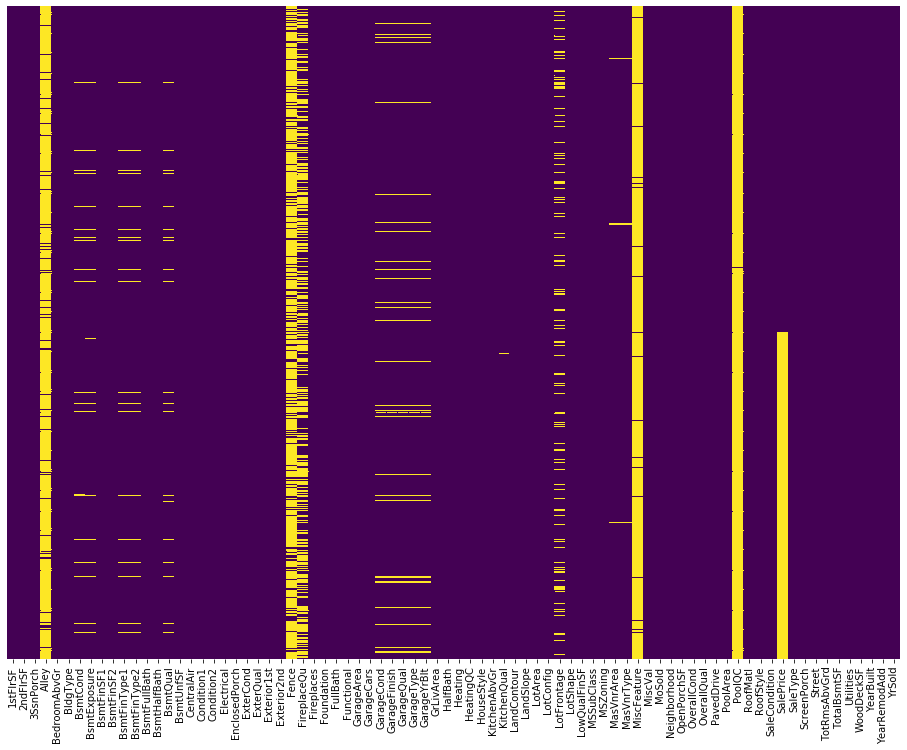

In [8]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

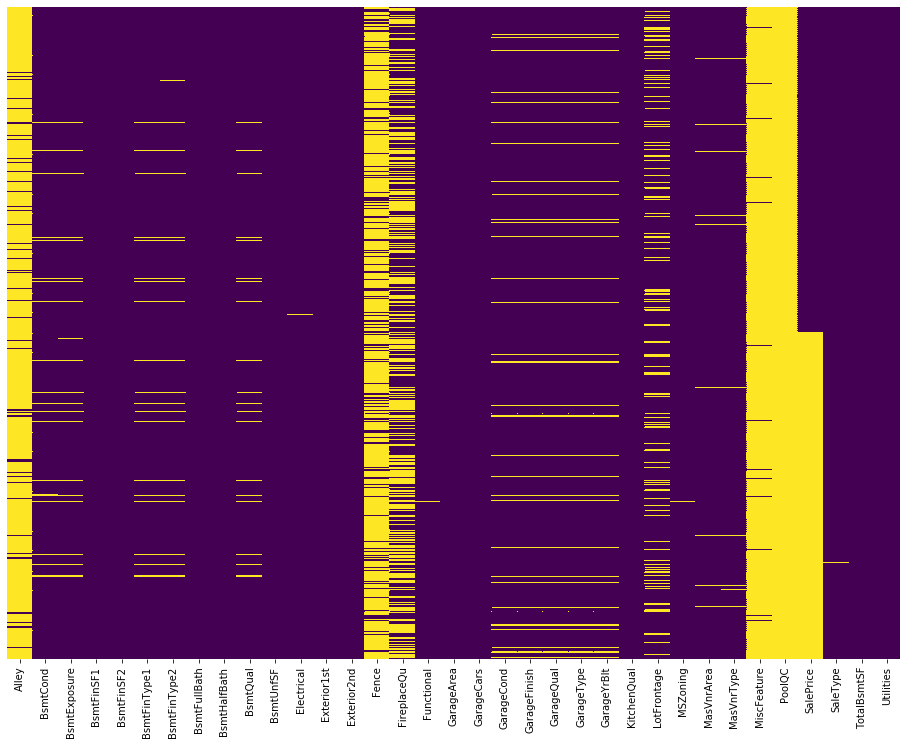

In [9]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df.columns[df.isnull().sum() > 0].tolist()
sns.heatmap(df[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [10]:
print(col_missing_data)

['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF', 'Utilities']


In [11]:
## Data that can be filled based on Domain knowledge
Fill_with_none = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                  'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu',
                  'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
                  'MiscFeature', 'PoolQC', 'MasVnrType', 'Exterior2nd'
                 ] 

Fill_with_zero = [ 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  'BsmtFullBath', 'BsmtHalfBath','GarageArea', 'GarageCars', 
                  'GarageYrBlt', 'MasVnrArea', 'LotFrontage'
                 ]

Fill_with_mode = [ 'Electrical', 'Exterior1st',  'Functional', 
                  'KitchenQual',  'MSZoning', 'SaleType', 'Utilities'
                 ]

for col in Fill_with_none:
    df[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)
    df_train[col].fillna("None", inplace=True)

for col in Fill_with_zero:
    df[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)
    df_train[col].fillna(0, inplace=True)

for col in Fill_with_mode:
    mode = df[col].value_counts().idxmax()
    df[col].fillna(mode, inplace=True)
    df_test[col].fillna(mode, inplace=True)
    df_train[col].fillna(mode, inplace=True)

df.columns[df.isnull().sum() > 0].tolist()

['SalePrice']

# Exploratory Data Analysis

## Numerical

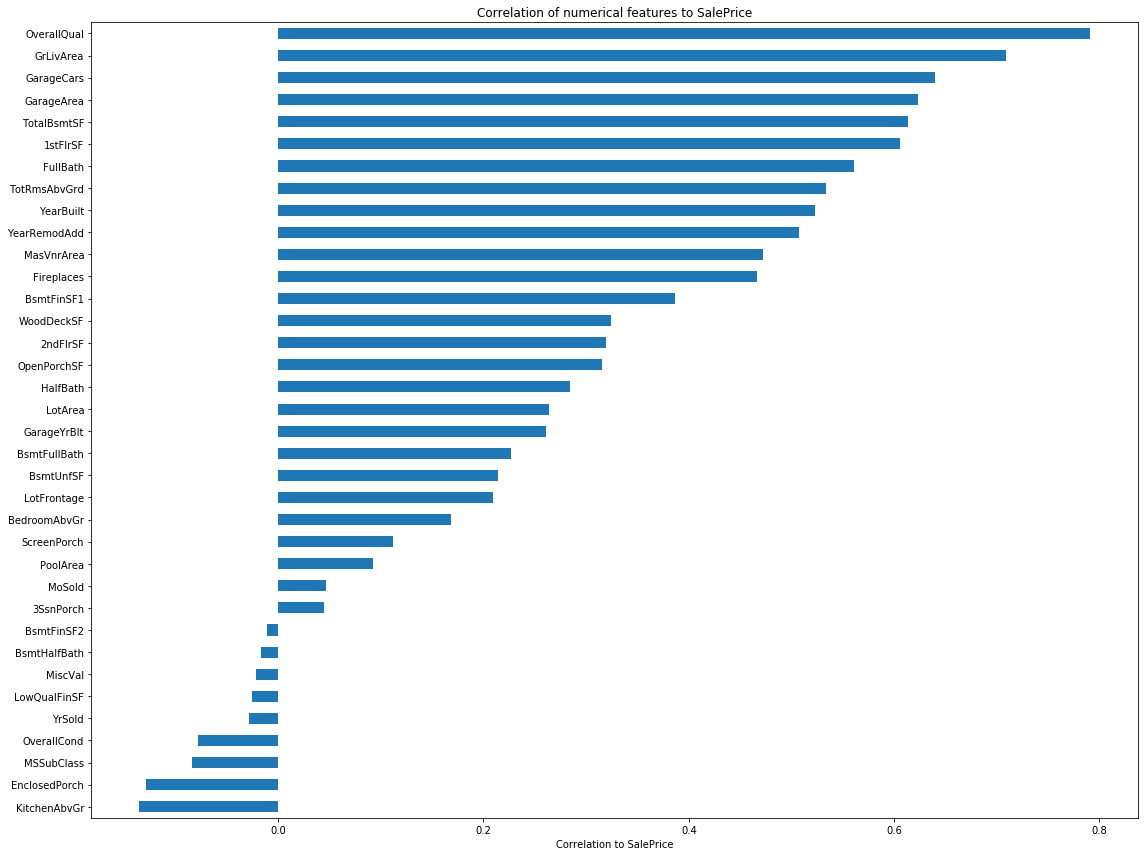

In [12]:
plt.figure(figsize=(16,12));
corr = df_train.corr()['SalePrice']
corr.sort_values(ascending=True)[:-1].plot(kind="barh")

plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

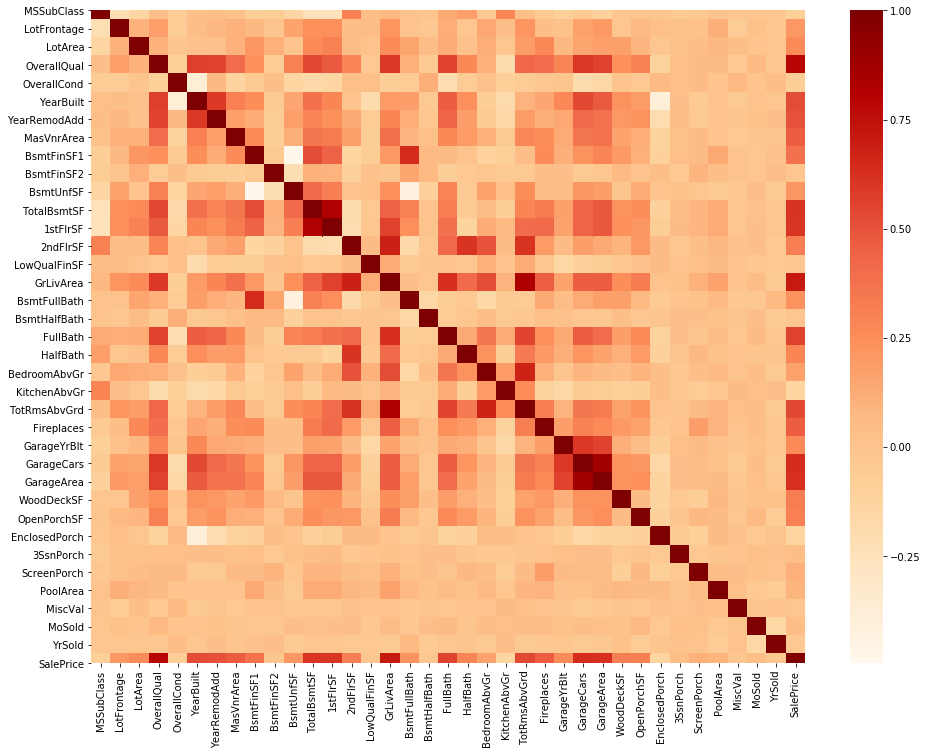

In [13]:
plt.figure(figsize=(16,12));
sns.heatmap(df_train.corr(), cmap = 'OrRd')

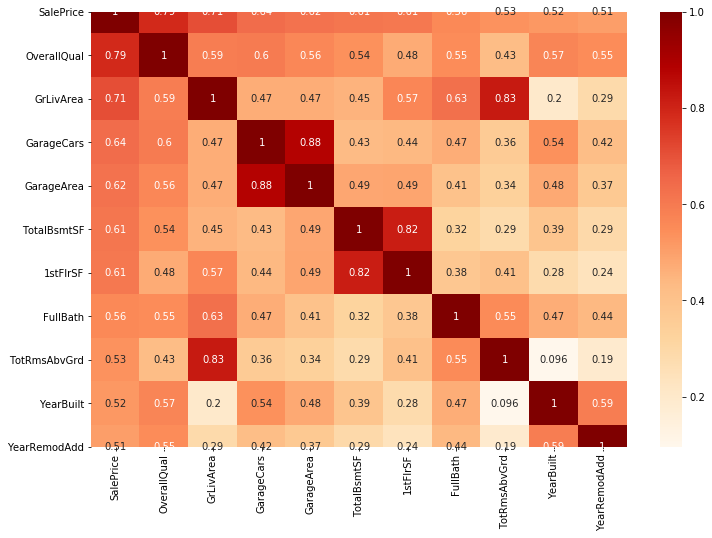

In [14]:
high_corr = df_train.corr()['SalePrice'][(abs(df_train.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)

plt.figure(figsize=(12,8));
sns.heatmap(df_train[high_corr.index].corr(), annot=True, cbar=True, cmap = 'OrRd')

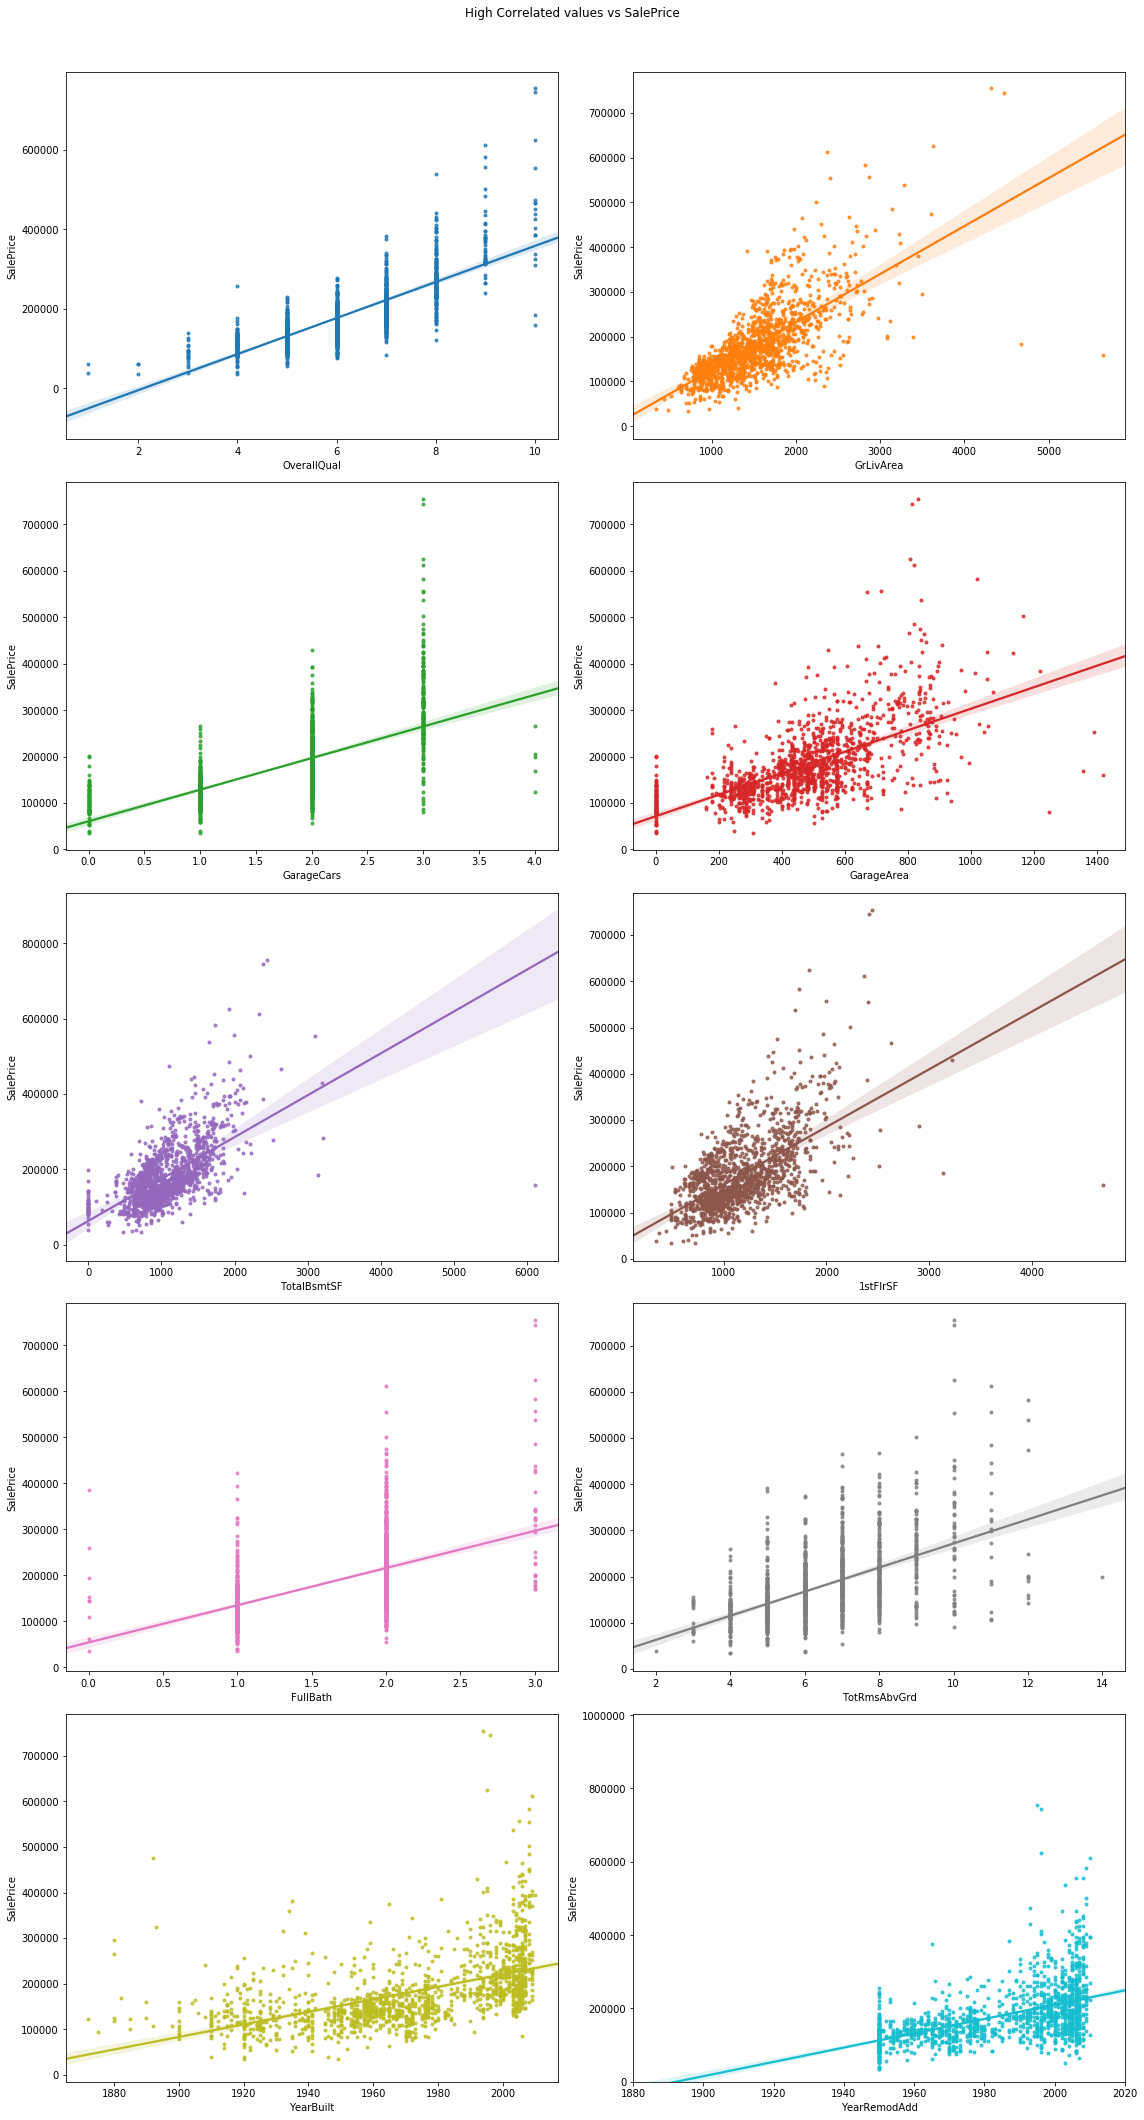

In [15]:
fig, ax = plt.subplots(5, 2, figsize=(16,30))

for idx,col in enumerate(high_corr[1:].index):
    sns.regplot(x=df_train[col], y=df_train["SalePrice"], marker='.', ax=ax[idx//2, idx%2]) 

ax[4,1].set_ylim(0,)
ax[4,1].set_xlim(1880, 2020)

fig.suptitle('High Correlated values vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

In [16]:
df_numerical = df_train.select_dtypes("number")
num_list = df_numerical.columns.tolist()

In [17]:
for feat in high_corr.index.tolist():
    num_list.remove(feat)

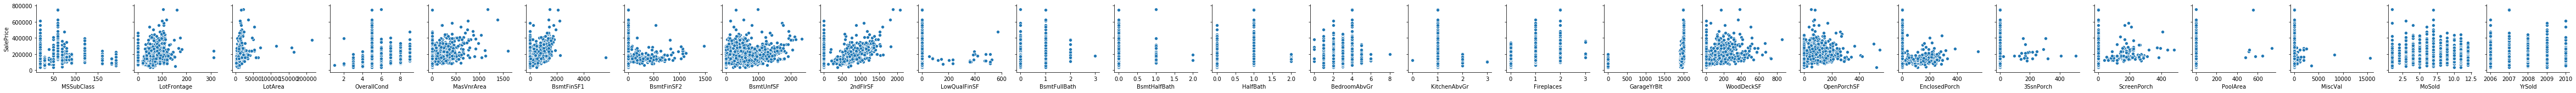

In [18]:
sns.pairplot(data=df_train, x_vars=num_list, y_vars = "SalePrice")

### Numerical

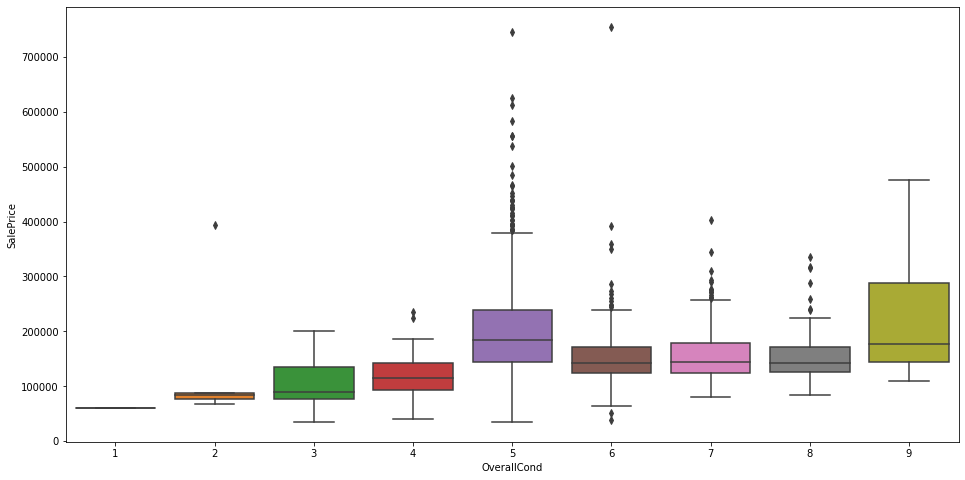

In [19]:
plt.figure(figsize=(16,8));
sns.boxplot(x=df_train['OverallCond'], y=df_train['SalePrice'])

## Categorical

In [20]:
cat_col = df_train.select_dtypes(exclude=np.number).columns.tolist()
print(cat_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


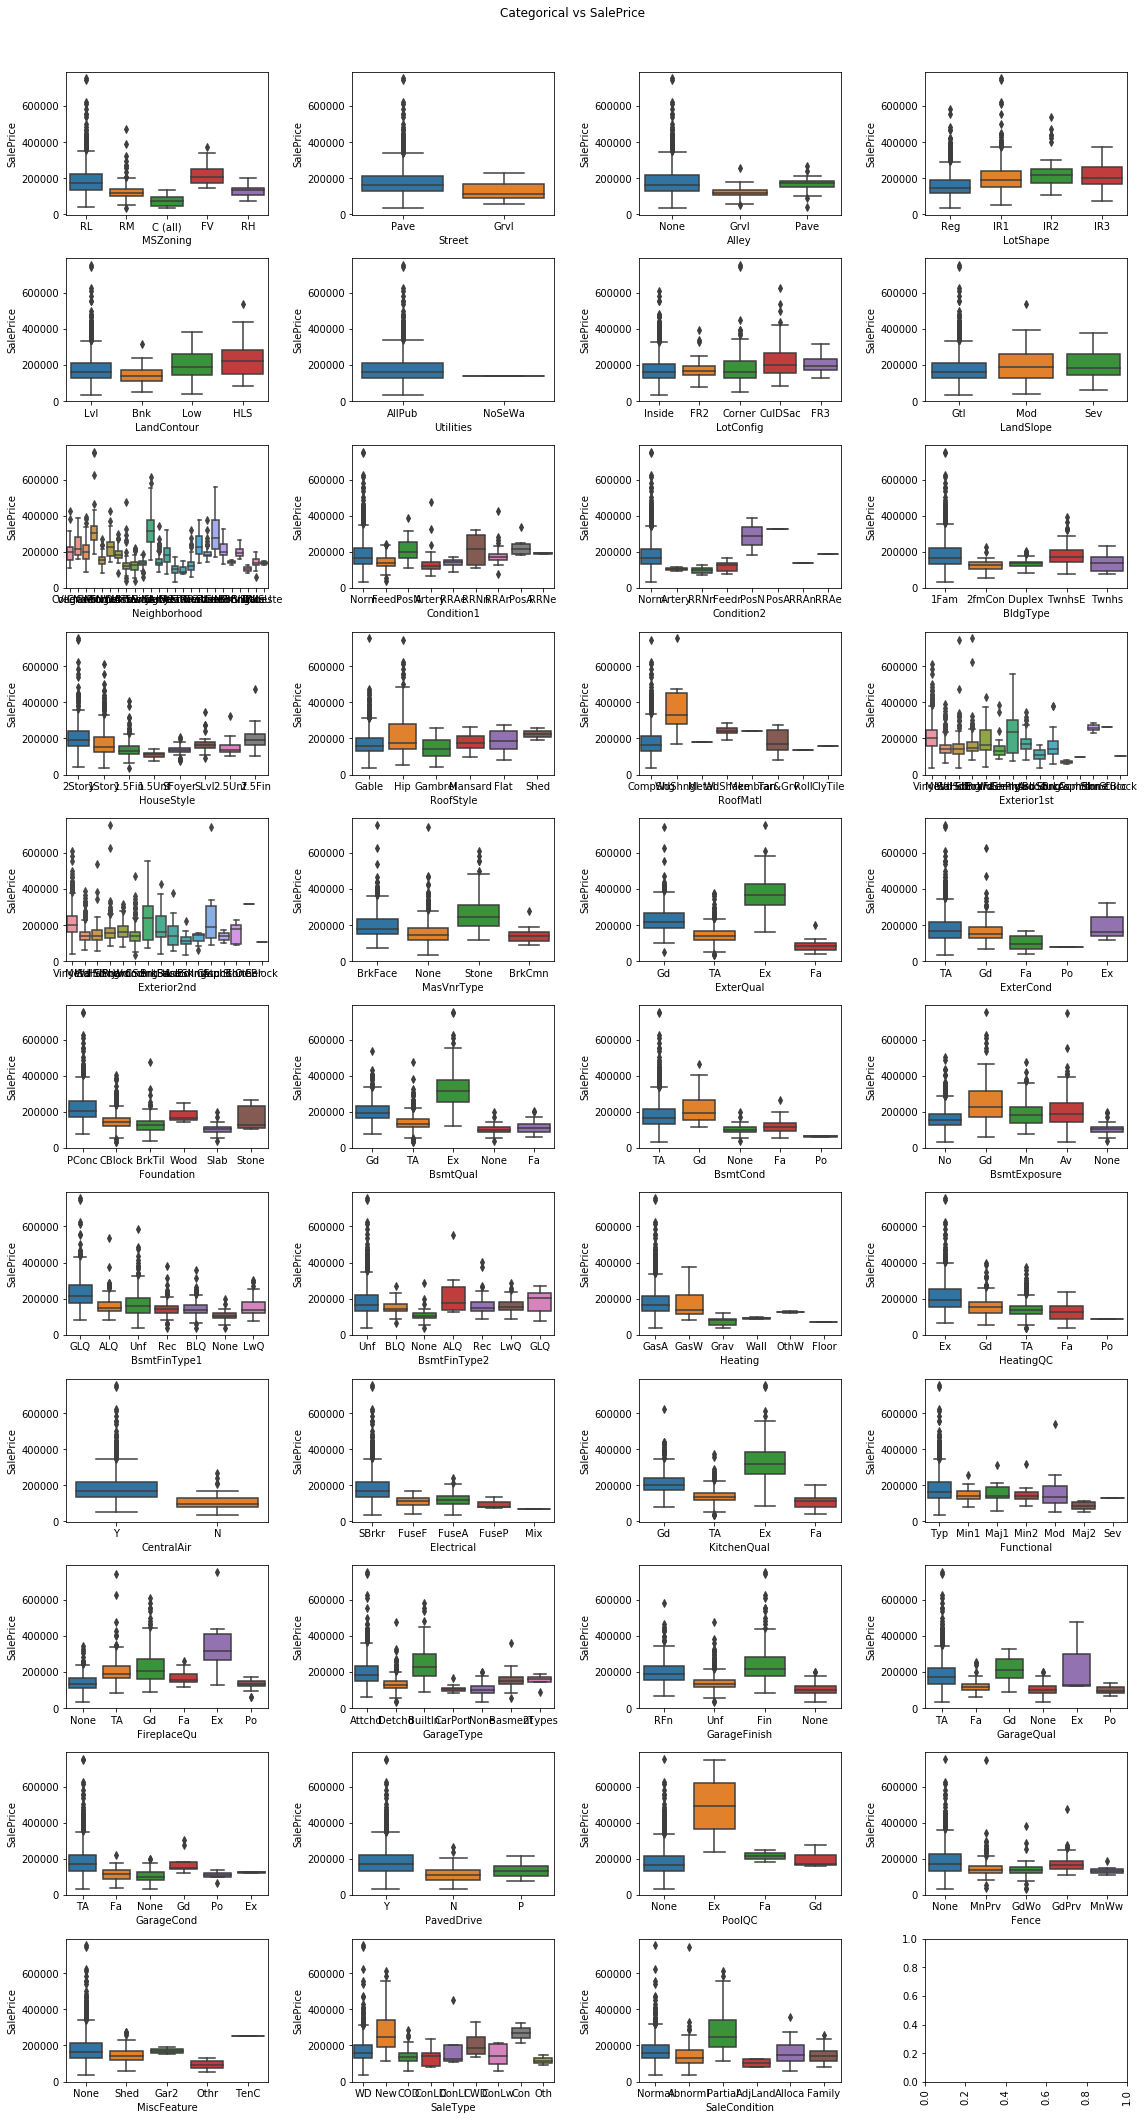

In [21]:
fig, ax = plt.subplots(11, 4, figsize=(16,30))

for idx,col in enumerate(cat_col):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx//4, idx%4]) 
plt.xticks(rotation=90)
fig.suptitle('Categorical vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Road Conditions

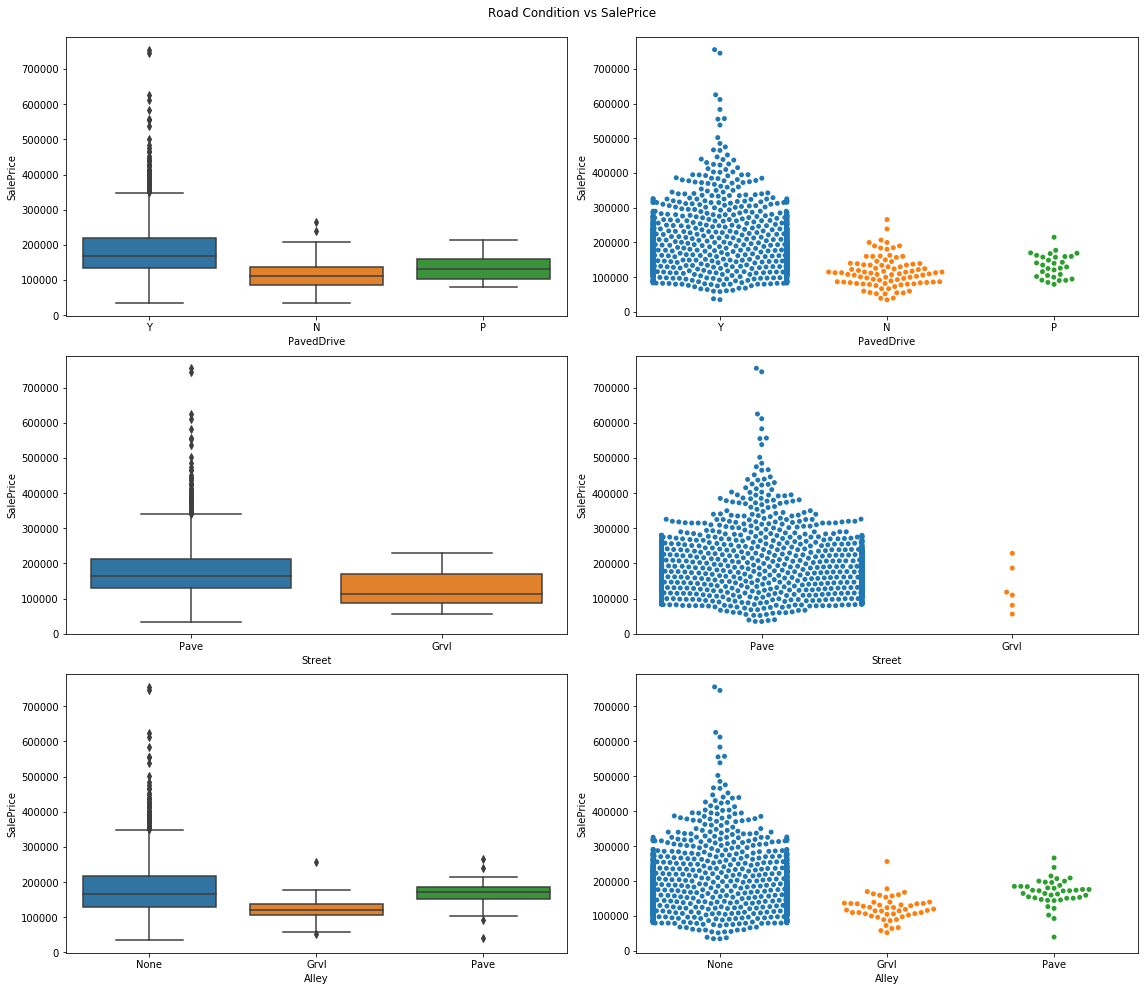

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(16,14))

Paved = ['PavedDrive', 'Street', 'Alley']

for idx,col in enumerate(Paved):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Road Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Lot Condition

<Figure size 1152x576 with 0 Axes>

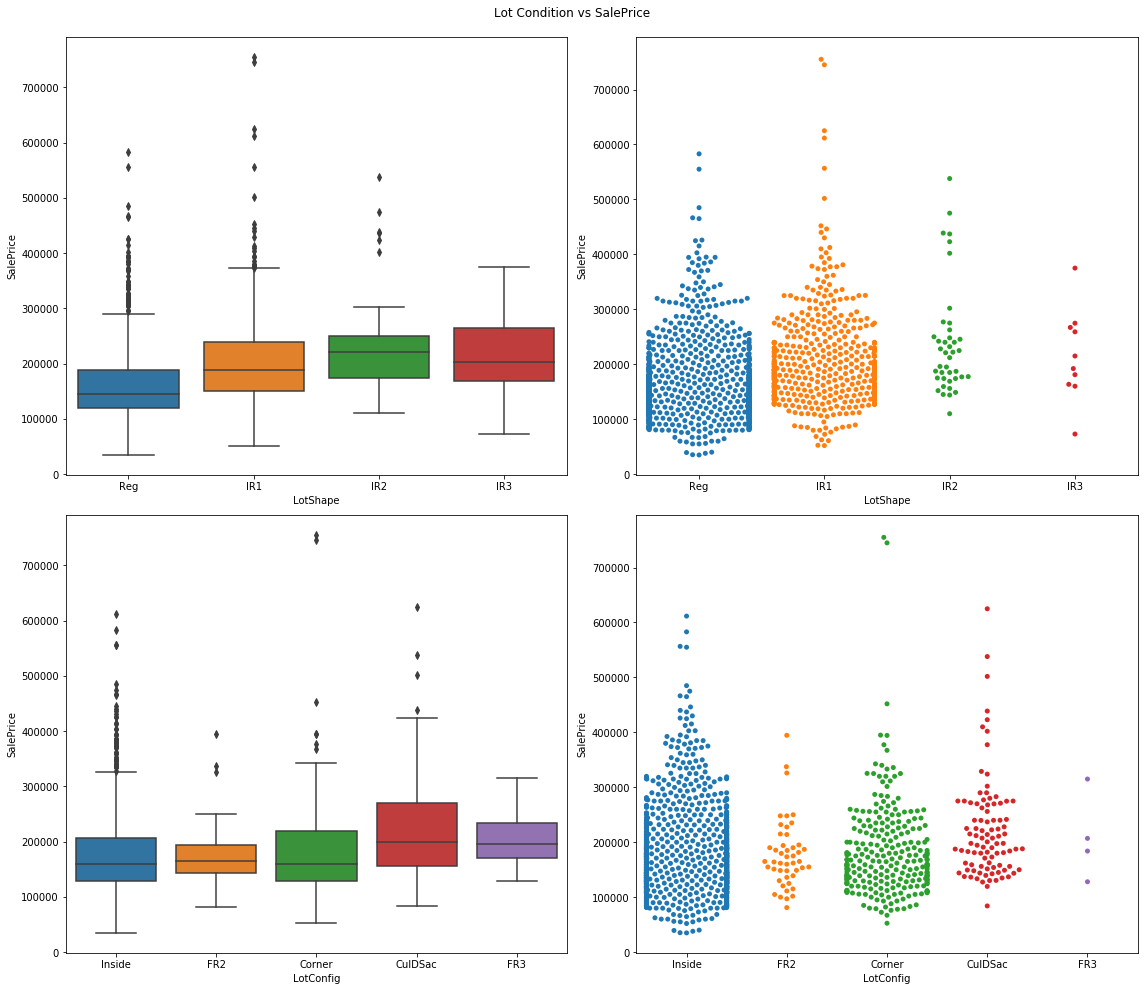

In [23]:
plt.figure(figsize=(16,8));

fig, ax = plt.subplots(2, 2, figsize=(16,14))

Lot = ['LotShape', 'LotConfig']
 
for idx,col in enumerate(Lot):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Lot Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Garage

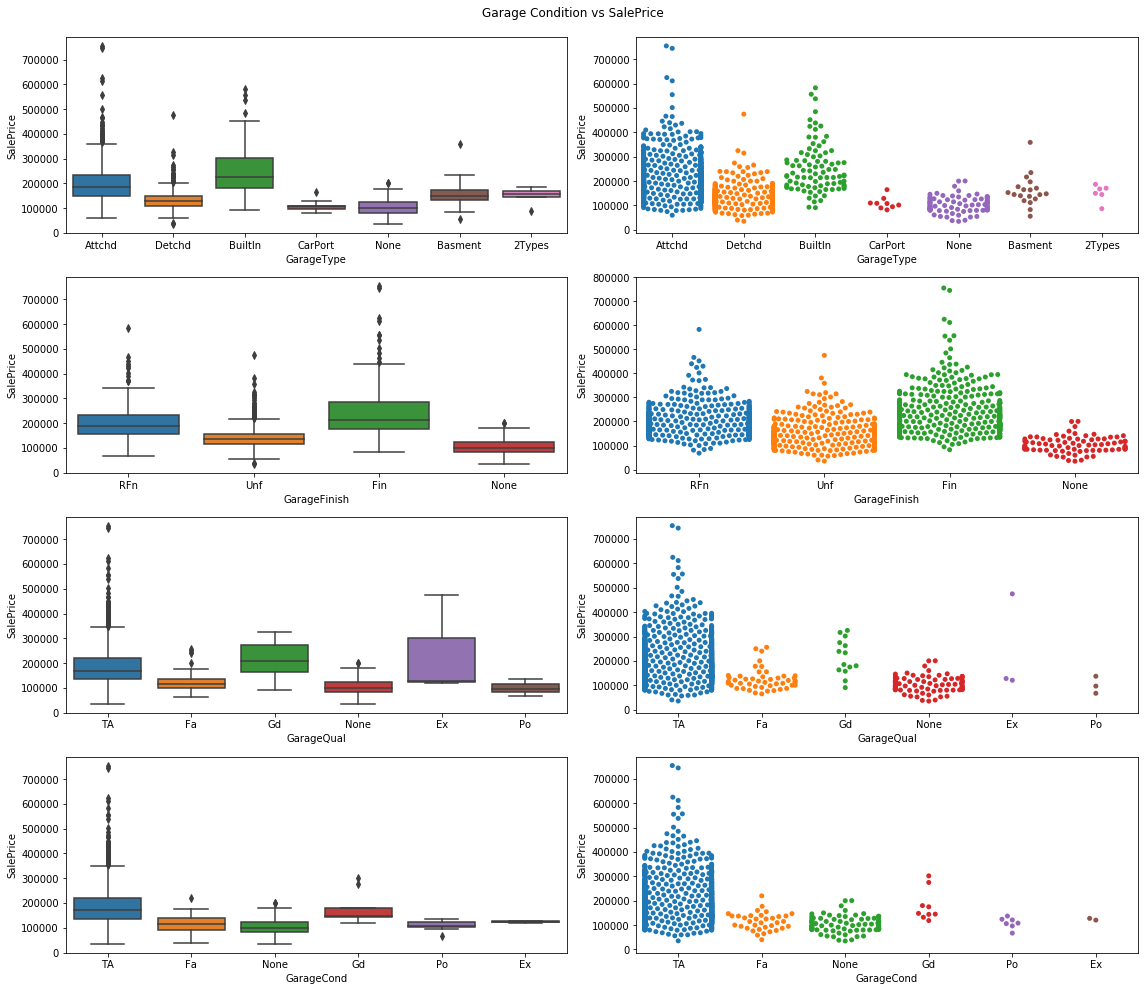

In [24]:
fig, ax = plt.subplots(4, 2, figsize=(16,14))

Garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for idx,col in enumerate(Garage):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Garage Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Bsmt

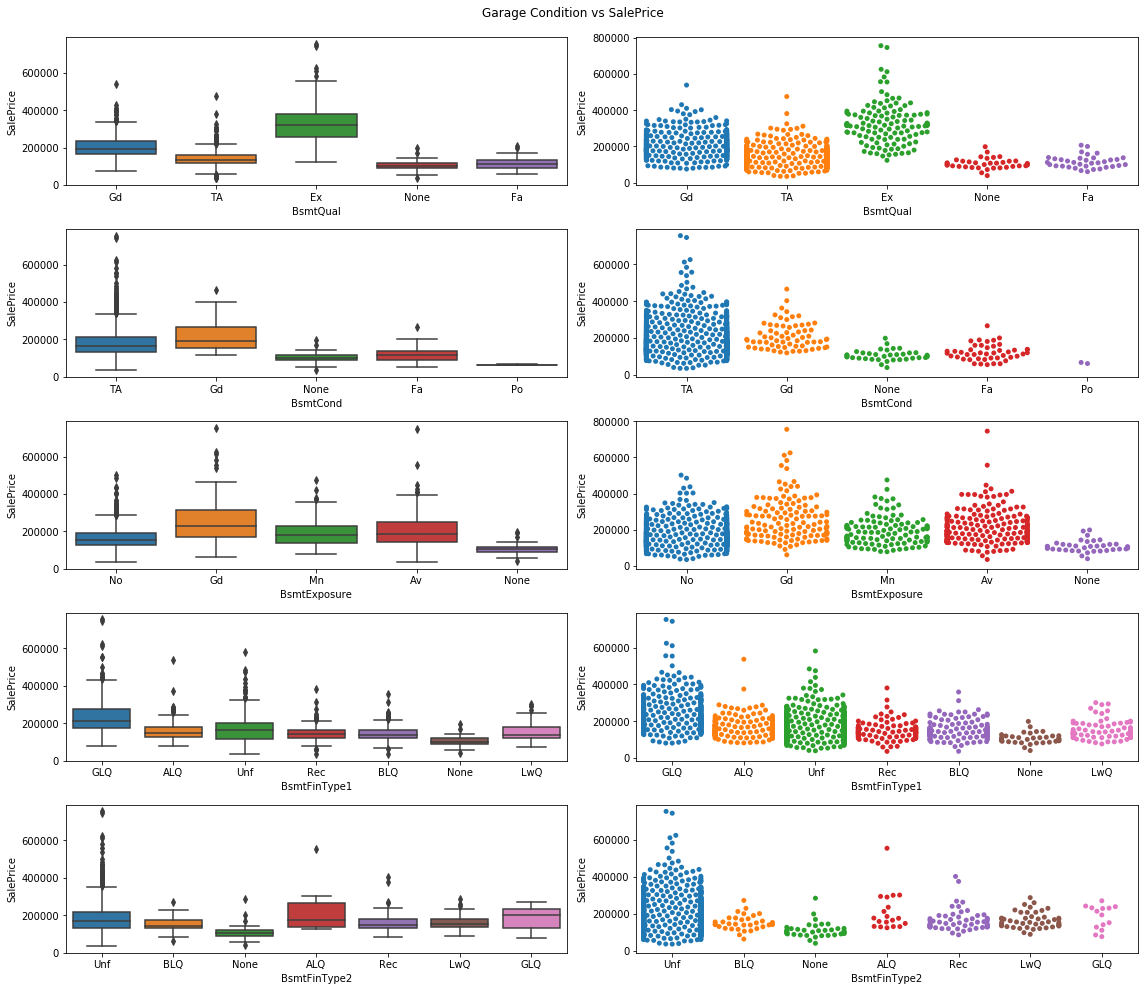

In [25]:
fig, ax = plt.subplots(5, 2, figsize=(16,14))

Basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for idx,col in enumerate(Basement):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Garage Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

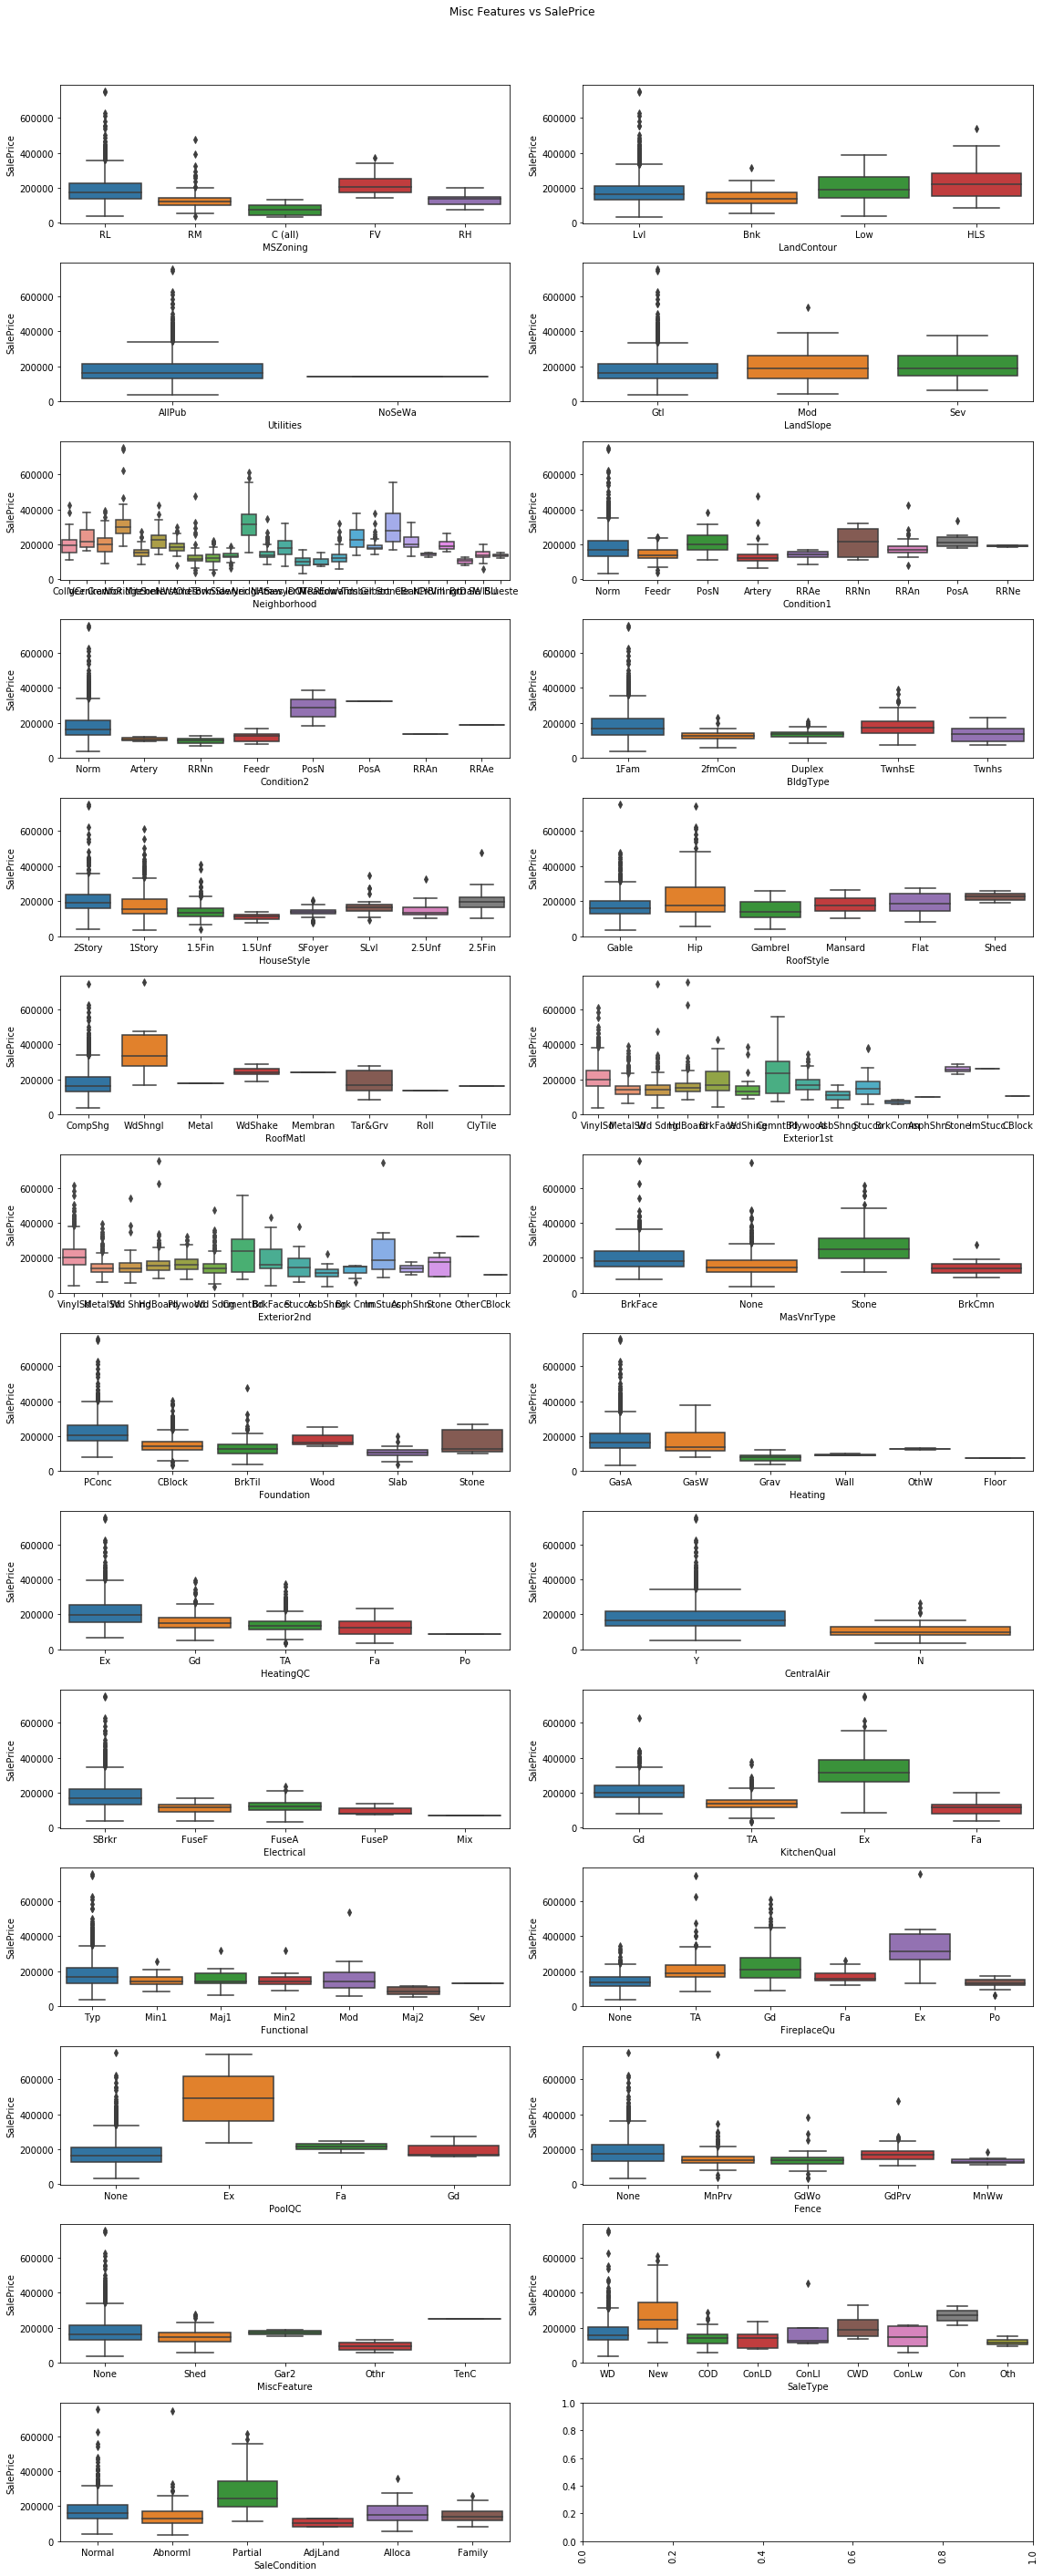

In [26]:
fig, ax = plt.subplots(14, 2, figsize=(16,40))

Misc = ['MSZoning', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 
     'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
     'Exterior1st', 'Exterior2nd', 'MasVnrType',  'Foundation', 'Heating', 
     'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
     'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for idx,col in enumerate(Misc):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx//2, idx%2]) 
    plt.xticks(rotation=90)
fig.suptitle('Misc Features vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

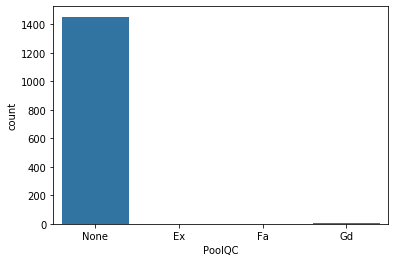

In [27]:
sns.countplot(df_train['PoolQC'])

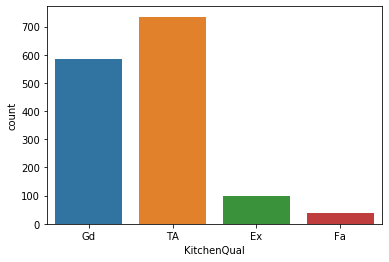

In [28]:
sns.countplot(df_train['KitchenQual'])

##### Porch

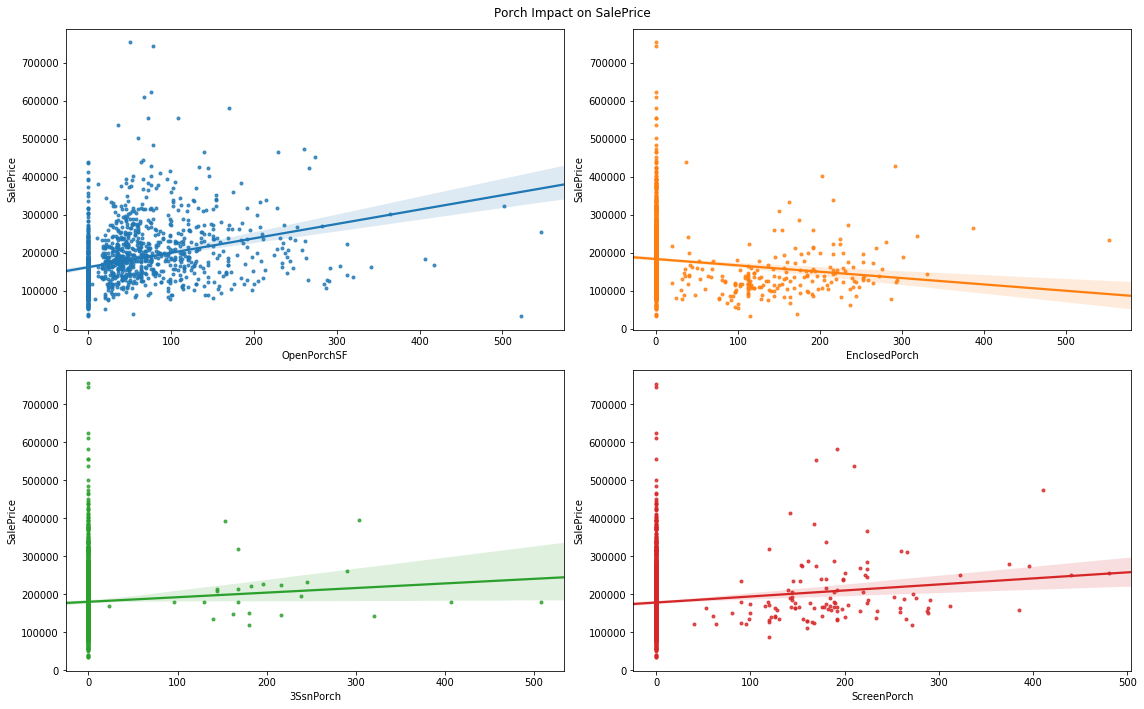

In [29]:
porchs = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

fig, ax = plt.subplots(2, 2, figsize=(16,10))

numerical = df_train.select_dtypes(include=np.number).columns.tolist()
for idx,col in enumerate(porchs):
    sns.regplot(x=df_train[col], y=df_train["SalePrice"], marker='.', ax=ax[idx//2, idx%2])  

fig.suptitle('Porch Impact on SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

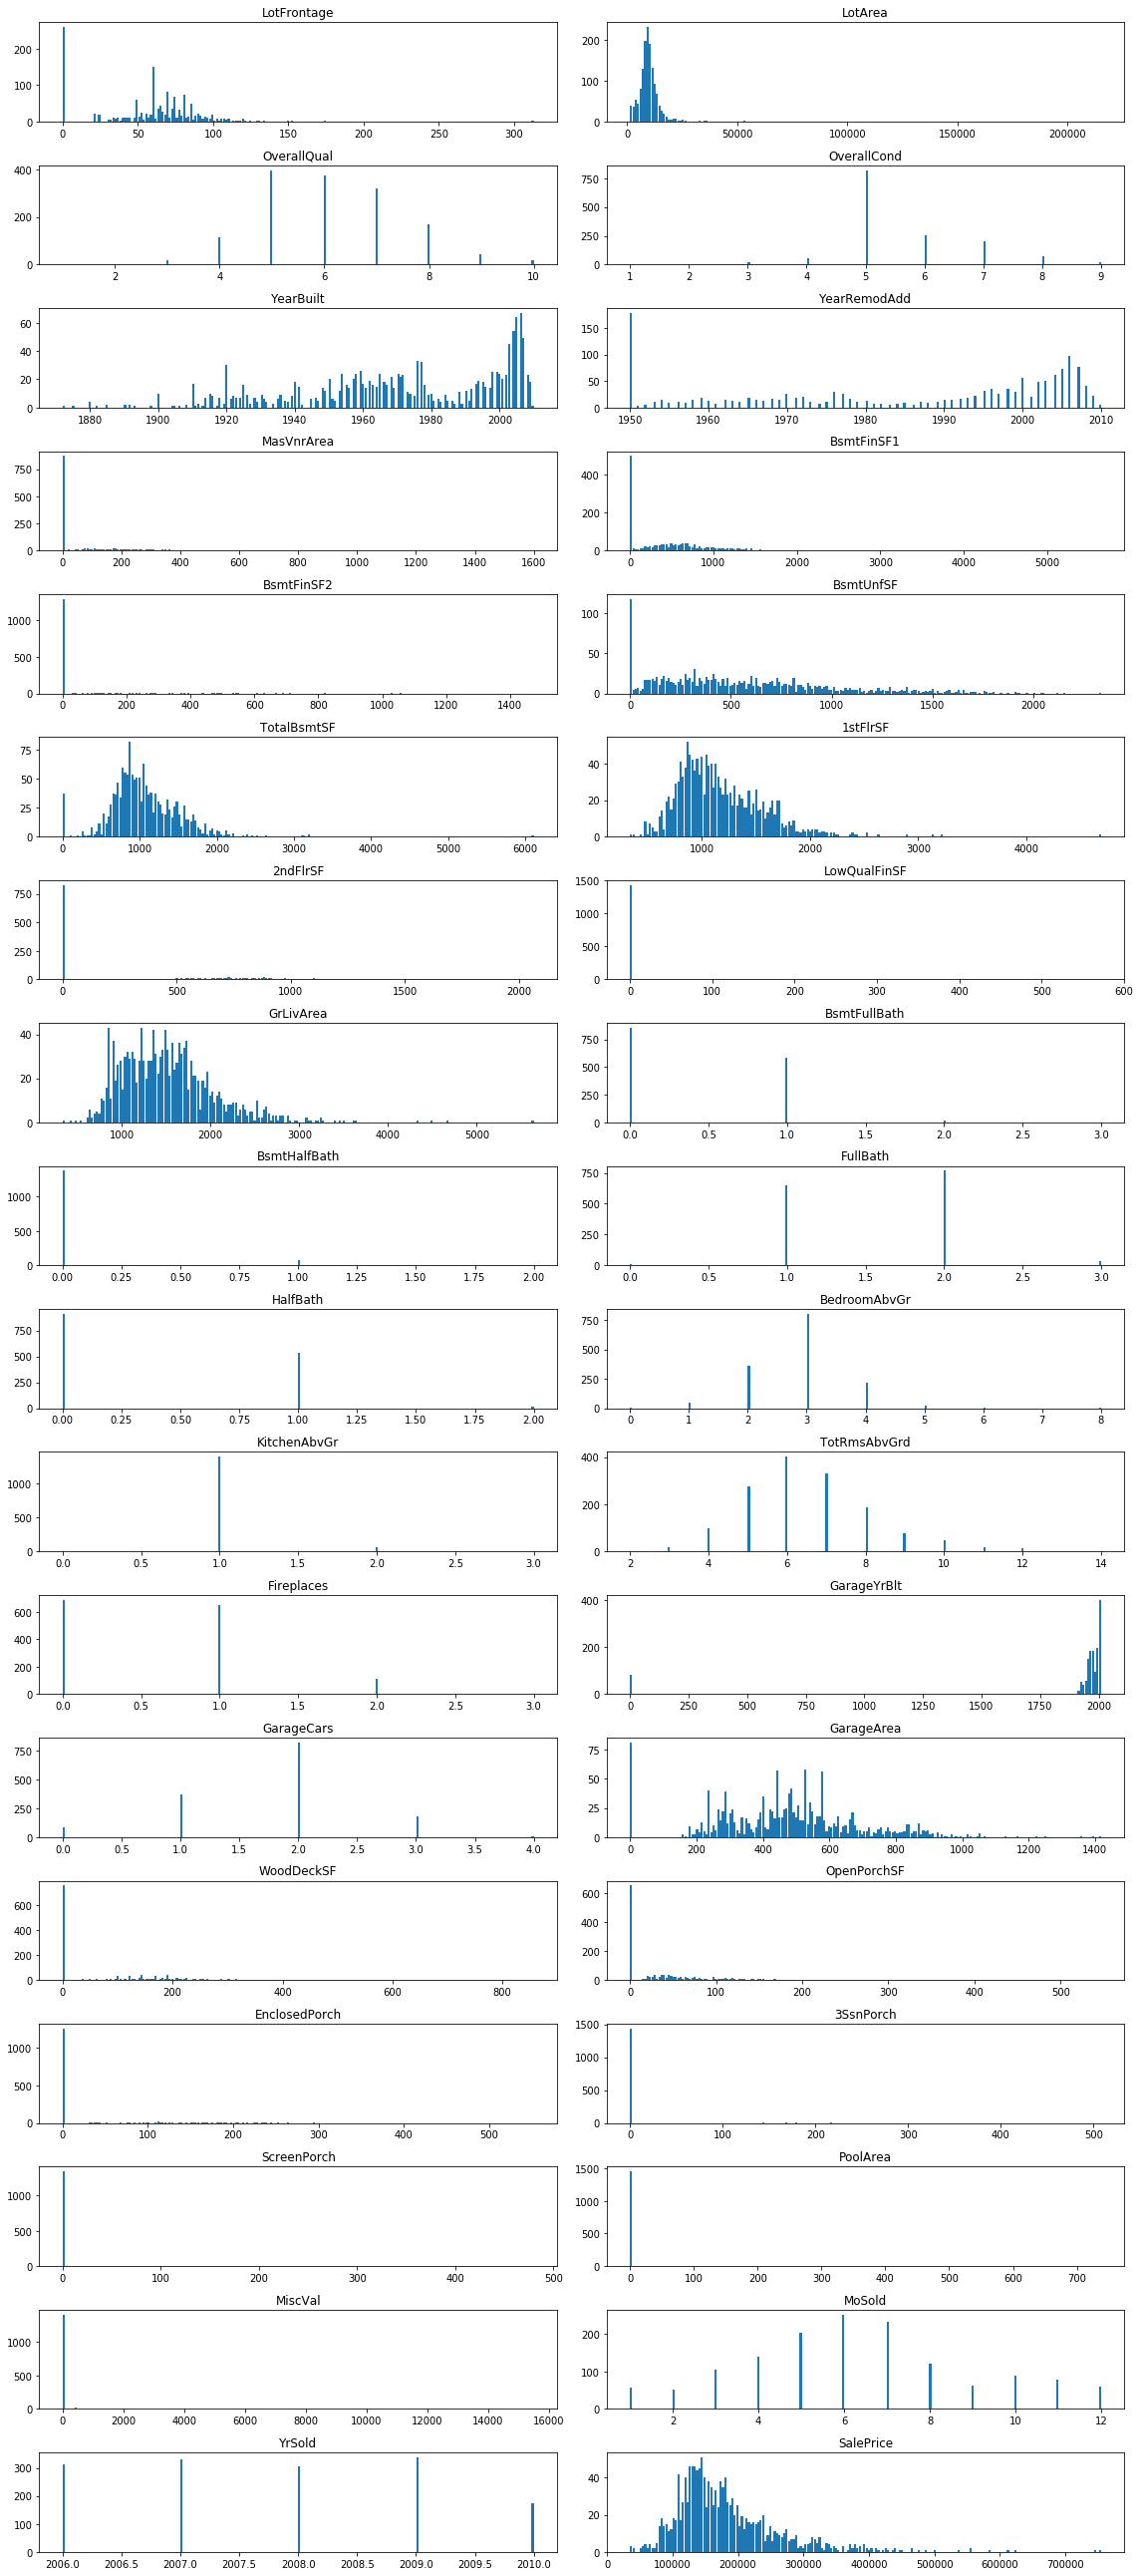

In [30]:
fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(16,36))

for idx, col in enumerate(df_numerical.columns[1:]):
    df_numerical[col].plot(kind="hist", bins=200, rwidth=.9, title=col, ax=axes[idx//2, idx%2])
    ax=axes[idx//2, idx%2].yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

## Sale Price Analysis

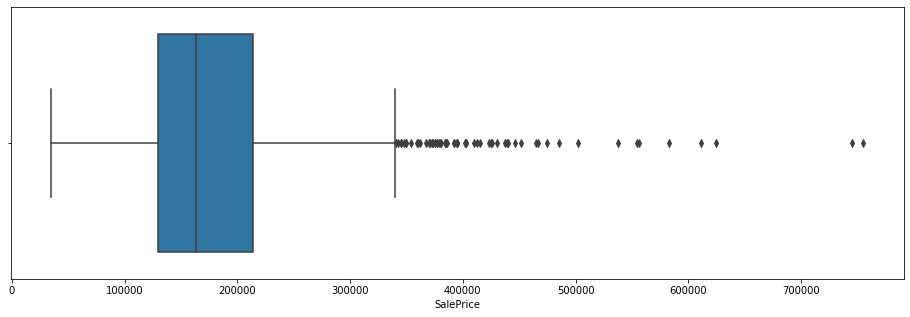

In [31]:
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(df['SalePrice'])

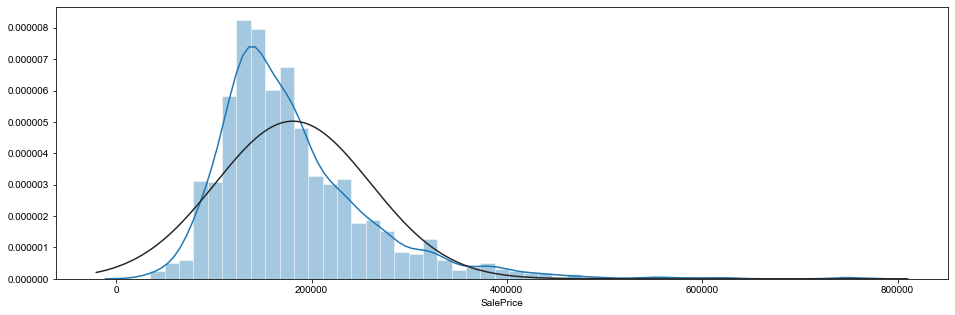

In [32]:
f, ax = plt.subplots(figsize=(16, 5))
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

Text(0.5, 1.0, 'Probability plot: SalePrice')

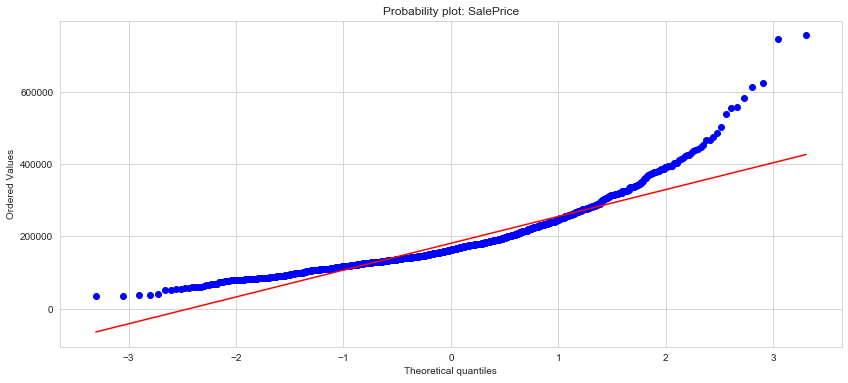

In [33]:
plt.figure(figsize=(14,6))
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

In [34]:
# calculate percentiles and IQR
q25 = np.percentile(df_train.SalePrice, 25)
q75 = np.percentile(df_train.SalePrice, 75)
iqr = q75 - q25

# calculate normal and extreme upper and lower cut off
cut_off = iqr * 3
lower_extreme_outlier = q25 - cut_off 
upper_extreme_outlier = q75 + cut_off

print(f'Percentiles:\n25th  =  {q25}\n75th  =  {q75}\n\nIQR   =   {iqr}\nlower = {lower_extreme_outlier}\nupper =  {upper_extreme_outlier}')

Percentiles:
25th  =  129975.0
75th  =  214000.0

IQR   =   84025.0
lower = -122100.0
upper =  466075.0


In [35]:
df_train[df_train.SalePrice > upper_extreme_outlier]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,20,RL,63.0,17423,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,7,2009,New,Partial,501837
185,75,RM,90.0,22950,Pave,None,IR2,Lvl,AllPub,Inside,...,0,None,GdPrv,None,0,6,2006,WD,Normal,475000
440,20,RL,105.0,15431,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2009,WD,Normal,555000
691,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,1,2007,WD,Normal,755000
769,60,RL,47.0,53504,Pave,None,IR2,HLS,AllPub,CulDSac,...,0,None,None,None,0,6,2010,WD,Normal,538000
798,60,RL,104.0,13518,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,7,2009,New,Partial,485000
803,60,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,1,2009,New,Partial,582933
898,20,RL,100.0,12919,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,3,2010,New,Partial,611657
1046,60,RL,85.0,16056,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,7,2006,New,Partial,556581
1169,60,RL,118.0,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,7,2006,WD,Normal,625000


In [36]:
print("SalePrice:")
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

SalePrice:
Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Probability plot: SalePrice')

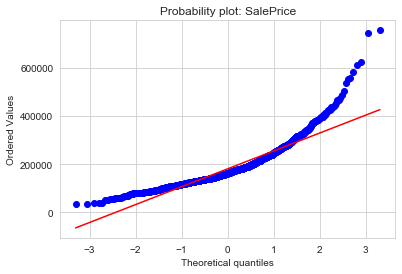

In [37]:
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

In [38]:
LogSalePrice = df_train["SalePrice"].apply(np.log)
LogSalePrice.name = 'LogSalePrice'
print("Log SalePrice:")
print("Skewness: %f" % LogSalePrice.skew())
print("Kurtosis: %f" % LogSalePrice.kurt())

Log SalePrice:
Skewness: 0.121335
Kurtosis: 0.809532


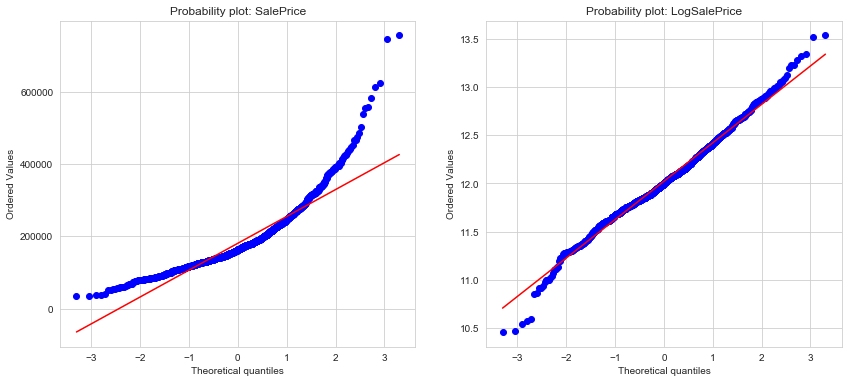

In [39]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

plt.subplot(1, 2, 2)
stats.probplot(LogSalePrice, plot=plt)
plt.title("Probability plot: LogSalePrice")
plt.show()

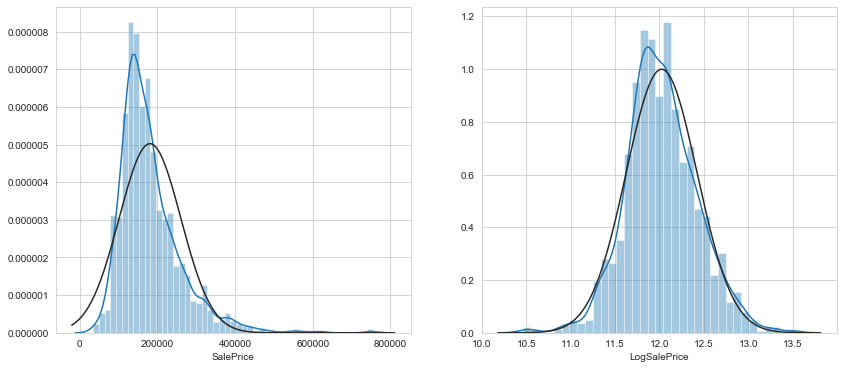

In [40]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
sns.distplot(LogSalePrice,fit=norm)

In [41]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [42]:
df['LogSalePrice'] = df['SalePrice'].apply(lambda x : np.log1p(x))

In [43]:
df.LogSalePrice.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: LogSalePrice, dtype: float64

# Data Pre-processing

## Encoding

In [44]:
categoricals = df.select_dtypes(exclude=np.number).columns.tolist()
print(categoricals)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [45]:
Norminal = ['MSZoning',  'LandContour', 'Heating',  'Electrical',  
            'LotConfig',  'Neighborhood', 'Condition1', 'Condition2', 
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',  
            'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

In [46]:
Ordinal = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 
           'BsmtFinType1', 'LandSlope', 'LotShape', 'PavedDrive', 
           'PoolQC', 'KitchenQual', 'Street', 'Alley', 
           'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 
           'GarageFinish', 'Fence', 'Utilities', 'CentralAir',
           'ExterQual', 'ExterCond', 'Functional']

### Ordinal

In [47]:
for col in ['KitchenQual', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageCond', 'GarageQual']:
    df[col] = df[col].replace(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,6).tolist()).astype(int)

for col in ['ExterQual', 'ExterCond', 'HeatingQC']:
    df[col] = df[col].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,5).tolist()).astype(int)

for col in ['BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].replace(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], np.arange(0,7).tolist()).astype(int)
    
df['Street'] = df.Street.replace(['Grvl', 'Pave'], np.arange(0,2).tolist()).astype(int)
df['Alley'] = df.Alley.replace(['None', 'Grvl', 'Pave'], np.arange(0,3).tolist()).astype(int)
df['PoolQC'] = df.PoolQC.replace(['None', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,5).tolist()).astype(int)
df['Functional'] = df.Functional.replace(['None', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], np.arange(0,9).tolist()).astype(int)
df['BsmtExposure'] = df.BsmtExposure.replace(['None', 'No', 'Mn', 'Av', 'Gd'], np.arange(0,5).tolist()).astype(int)
df['Fence'] = df.Fence.replace(['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], np.arange(0,5).tolist()).astype(int)
df['Utilities'] = df.Utilities.replace(['None', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'], np.arange(0,5).tolist()).astype(int)
df['CentralAir'] = df.CentralAir.replace(['N', 'Y'], np.arange(0,2).tolist()).astype(int)
df['PavedDrive'] = df.PavedDrive.replace(['N', 'P', 'Y'], [0, 1, 2]).astype(int)
df['GarageFinish'] = df.GarageFinish.replace(['None', 'Unf', 'RFn', 'Fin'], np.arange(0,4).tolist()).astype(int)

df['LandContour'] = df.LandContour.replace(['Low', 'HLS' , 'Bnk', 'Lvl'], np.arange(0,4).tolist()).astype(int)
df['LandSlope'] = df.LandSlope.replace(['Sev', 'Mod', 'Gtl'], np.arange(0,3).tolist()).astype(int)
df['LotShape'] = df.LotShape.replace(['IR3', 'IR2', 'IR1', 'Reg'], np.arange(0,4).tolist()).astype(int)

In [48]:
categoricals = df.select_dtypes(exclude=np.number).columns.tolist()
print(categoricals)

['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']


In [49]:
[value for value in Ordinal if value in categoricals] 

[]

### Norminal

In [50]:
for category in categoricals:
    dummy = pd.get_dummies(df[category], prefix = category)
    df = pd.concat([df, dummy], axis = 1)
    df.drop(category, axis=1, inplace=True)

In [51]:
df.select_dtypes(exclude=np.number).columns.tolist()

[]

# Feature Engineering

In [52]:
non_numerical = ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
                 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
                 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
                 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
                 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
                 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities',
                'SalePrice']

In [53]:
high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
high_corr

SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

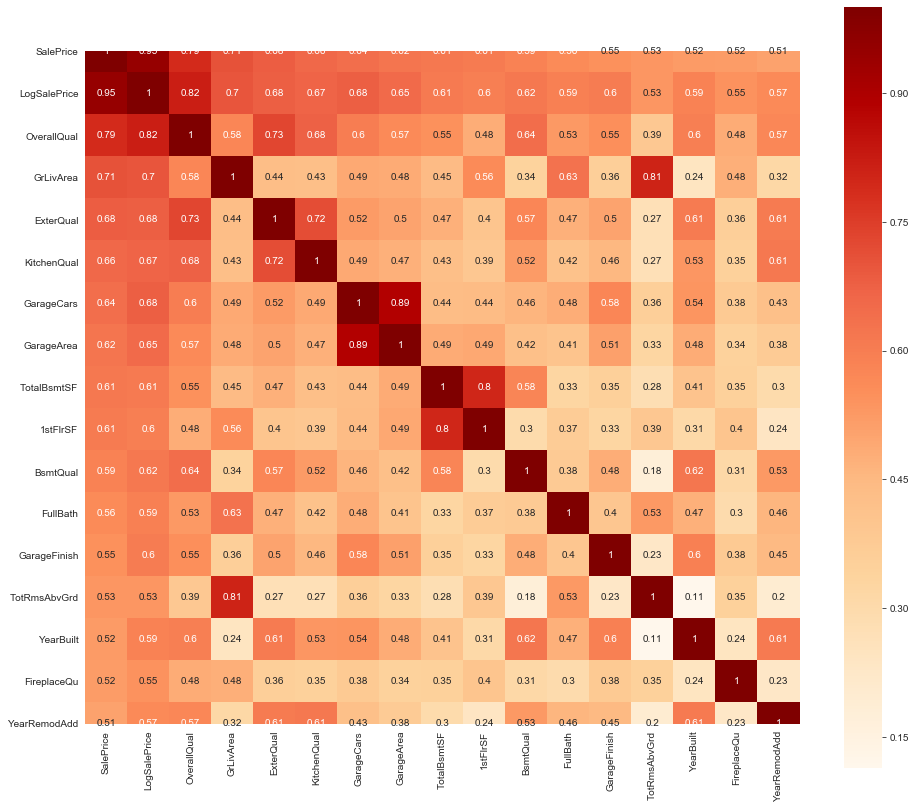

In [54]:
fig, axes = plt.subplots(figsize=(16,14))
sns.heatmap(df[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

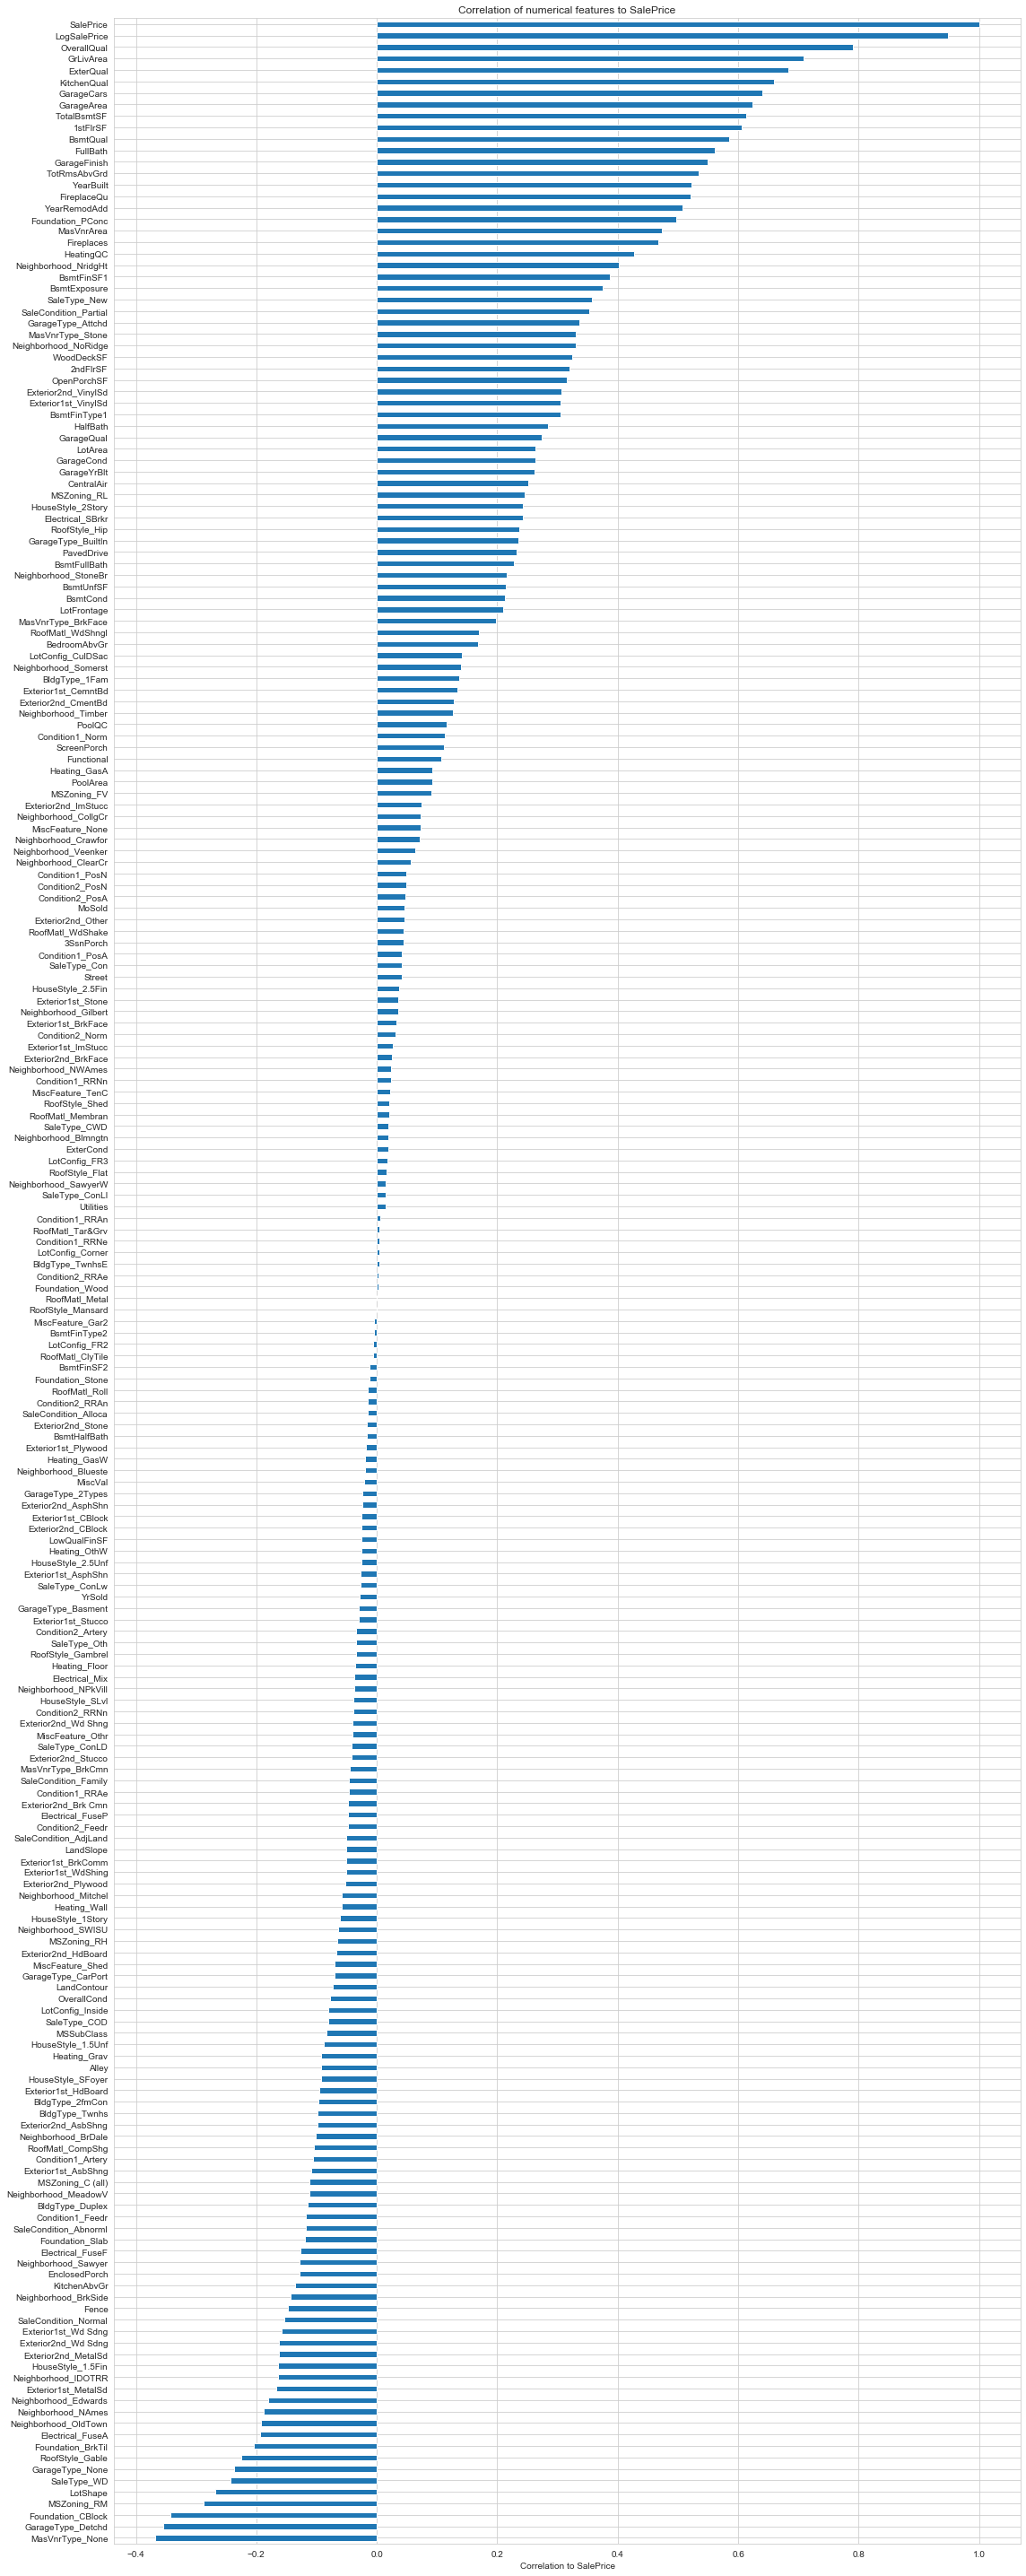

In [55]:
plt.figure(figsize=(16,40));
corr = df.corr()['SalePrice']

# high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
corr.sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

### Basement

In [56]:
df['BsmtSpace'] = df['BsmtQual'] * df['TotalBsmtSF']

### Porch

In [57]:
df['hasScreenPorch'] = df['ScreenPorch'].apply(lambda x: 0 if x > 0 else 1)
df['hasEnclosedPorch'] = df['EnclosedPorch'].apply(lambda x: 0 if x > 0 else 1)
df['hasOpenPorchSF'] = df['OpenPorchSF'].apply(lambda x: 0 if x > 0 else 1)
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']
df['hasPorch'] = df['TotalPorchSF'].apply(lambda x : 0 if x > 0 else 1)

### Surface Area

In [58]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

### has Property

In [59]:
df['hasFireplace'] = df['FireplaceQu'].apply(lambda x : 0 if x == 0 else 1)
df['hasGarage'] = df['GarageArea'].apply(lambda x : 0 if x == 0 else 1)
df['hasBasement'] = df['BsmtExposure'].apply(lambda x : 0 if x == 0 else 1)
df['hasPool'] = df['PoolQC'].apply(lambda x : 0 if x == 0 else 1)
df['hasFence'] = df['Fence'].apply(lambda x : 0 if x == 0 else 1)
df['hasRenovate'] = df ['YearRemodAdd'] - df['YearBuilt']
df['hasRenovate'] = df['hasRenovate'].apply(lambda x: 0 if x == 0 else 1)

### Quality

In [60]:
df['TotalQual'] = df['KitchenQual'] + df['ExterQual'] + df['OverallQual']
df['PaveScore'] = df['PavedDrive'] + df['Alley'] + df['Street']

## Correlation

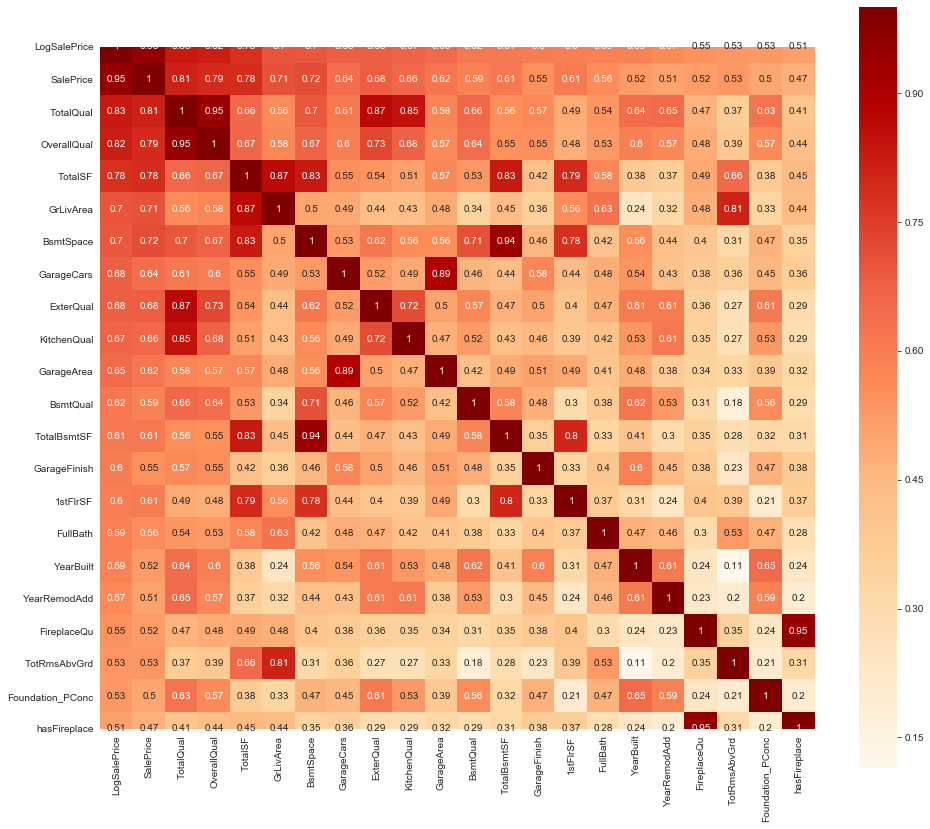

In [61]:
high_corr = df.corr()['LogSalePrice'][(abs(df.corr()['LogSalePrice']) > 0.5)].sort_values(ascending = False)
high_corr
fig, axes = plt.subplots(figsize=(16,14))
sns.heatmap(df[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

# Prediction

## Data Splitting

In [62]:
df = df[[c for c in df if c != 'LogSalePrice'] + ['LogSalePrice']]
# df.drop('SalePrice', axis=1, inplace=True)



In [63]:
a

NameError: name 'a' is not defined

In [ ]:
df_train = df[df['LogSalePrice'].notnull()]
df_test = df[df['LogSalePrice'].isnull()]

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.loc[:,high_corr.index.tolist()[1:]].values
y = df_train.loc[:,high_corr.index.tolist()[0]].values

X_train, X_Valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

## XGBoost

In [ ]:
# When predict the y_valid, apply np.exp() to it

## Random Tree Regressor

## Ridge regression

## Support Vector Regressor

## Lasso regression

# Data Pre-Processing

# Prediction

## XGBoost

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor(n_estimators = 300, random_state = 0)
RFR.fit(X_train, y_train)

In [ ]:
y_pred = RFR.predict(X_Valid)

In [ ]:
sns.scatterplot(y_valid, y_pred)

In [ ]:
sum((y_pred-y_valid)**2)

In [ ]:
# shuffle here
# k-fold cross validation

from sklearn.model_selection import train_test_split

X = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values

X_train, X_Valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
RFR2 = RandomForestRegressor(n_estimators = 300, random_state = 0)
RFR2.fit(X_train, y_train)

In [ ]:
y_pred = RFR2.predict(X_Valid)

In [ ]:
sns.scatterplot(y_valid, y_pred)

In [ ]:
sum((y_pred-y_valid)**2)